In [1]:
from qutip import*
import numpy as np
import matplotlib.pyplot as plt
from func import*

### below is  just for test

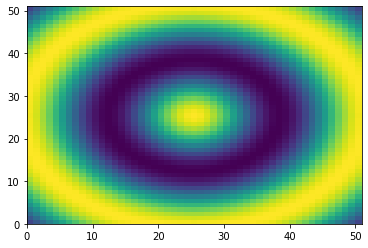

In [2]:
state_vac = tensor(fock(2, 0), fock(N, 0))
# FI_vac  = FI_calcluation(state_vac, vec)
p0 = probability(state_vac, vec)[0]
p1 = probability(state_vac, vec)[1]
plt.pcolormesh(p0)



0.11764705882352941
0.11764705882352941
0.11764705882352941
0.11764705882352941
0.11764705882352941
0.11764705882352941
0.11764705882352941
0.11764705882352941
0.11764705882352941
0.11764705882352941
0.11764705882352941
0.11764705882352941


/Users/panxiaozhou/Documents/GitHub/Metrology_project/protocol_simulation/protocol/func.py:59: RuntimeWarning: invalid value encountered in true_divide
  f_11 = (M_slope(p0, xvec, axis=0) * M_slope(p0, xvec, axis=0)) / p0 + (M_slope(p1, xvec, axis=0) * M_slope(p1, xvec, axis=0)) / p1
/Users/panxiaozhou/Documents/GitHub/Metrology_project/protocol_simulation/protocol/func.py:60: RuntimeWarning: invalid value encountered in true_divide
  f_12 = (M_slope(p0, xvec, axis=0) * M_slope(p0, yvec, axis=1)) / p0 + (M_slope(p1, xvec, axis=0) * M_slope(p1, yvec, axis=1)) / p1
/Users/panxiaozhou/Documents/GitHub/Metrology_project/protocol_simulation/protocol/func.py:61: RuntimeWarning: invalid value encountered in true_divide
  f_22 = (M_slope(p0, yvec, axis=1) * M_slope(p0, yvec, axis=1)) / p0 + (M_slope(p1, yvec, axis=1) * M_slope(p1, yvec, axis=1)) / p1
<ipython-input-3-201e9d592351>:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3

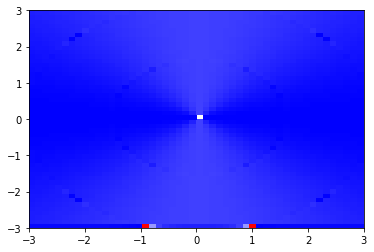

In [3]:
f11 = FI_calcluation(state_vac, vec)[0]
plt.pcolormesh(vec, vec, f11, cmap='bwr')

### vacuum state

In [2]:
# rho_vac = ket2dm( tensor(fock(2,0),fock(N,0)) )
# test = D(1) * rho_vac * D(1).dag()

# xvec = np.linspace(-3,3, 201)
# yvec = xvec
# w_test = wigner(test, xvec, yvec, g=2)
# fig, ax = plt.subplots()
# plt.pcolormesh(xvec, yvec, w_test, cmap='bwr', vmin=-1, vmax=1, shading='auto')
# ax.set_aspect('equal')

Displacement estimation by vacuum 

The Fisher information for two parameter esitmation:
   $ F(\xi, \eta) = \sum_\mu\frac{1}{P(\mu|\xi,\eta)}(\frac{\partial P(\mu|\xi, \eta)}{\partial \xi}*\frac{\partial P(\mu|\xi, \eta)}{\partial \eta})$

In [4]:
state_vac = tensor(fock(2, 0), fock(N, 0))
xvec = vec
yvec = vec
p0 = np.zeros((len(xvec), len(xvec)))
p1 = np.zeros((len(xvec), len(xvec)))
for m, vx in enumerate(vec):
    for n, vy in enumerate(vec):
        state_d = D(vx + 1j*vy) * state_vac
        p0[m, n] = abs(state_d.overlap(state_vac))**2
        p1[m, n] = 1 - p0[m, n]


Calculation of $\frac{\partial P(\mu|\xi, \eta)}{\partial \xi}$ and $\frac{\partial P(\mu|\xi, \eta)}{\partial \eta}$

In [5]:
def M_slope(data, vec, axis):
    "for the first and lase points:  p_(i+1)-p(i) ) / (alpha_(i+1)-alpha_(i))" 
    "the rest of points: p_(i+1)-p(i-1) ) / (alpha_(i+1)-alpha_(i-1))"
    step  = (vec.max() - vec.min()) / len(vec)
    if axis == 1:
        data_diff = data[:, 2:] - data[:, :-2]
        first_column = data[:,1] - data[:,0]
        last_column = data[:, -1] - data[:, -2]
        ## add first and last columns
        data_diff_add1 = np.insert(data_diff, 0, first_column, axis=1)
        data_diff_add2 = np.insert(data_diff_add1, data_diff_add1.shape[1], last_column, axis=1)
        slope = data_diff_add2 / (2 * step)
    else:
        data_diff = data[2:,:] - data[:-2, :]
        first_row = data[1, :] - data[0, :]
        last_row = data[-1, :] - data[-2, :]
        ## add first and last rows
        data_diff_add1 = np.insert(data_diff, 0, first_row, axis=0)
        data_diff_add2 = np.insert(data_diff_add1, data_diff_add1.shape[0], last_row, axis=0)
        slope = data_diff_add2 / (2 * step)
    return slope


In [6]:
xvec = vec
yvec = vec
f_11 = (M_slope(p0, xvec, axis=0) * M_slope(p0, xvec, axis=0)) / p0 + (M_slope(p1, xvec, axis=0) * M_slope(p1, xvec, axis=0)) / p1
f_12 = (M_slope(p0, xvec, axis=0) * M_slope(p0, yvec, axis=1)) / p0 + (M_slope(p1, xvec, axis=0) * M_slope(p1, yvec, axis=1)) / p1
f_22 = (M_slope(p0, yvec, axis=1) * M_slope(p0, yvec, axis=1)) / p0 + (M_slope(p1, yvec, axis=1) * M_slope(p1, yvec, axis=1)) / p1

<ipython-input-6-b79dc90a1bac>:3: RuntimeWarning: invalid value encountered in true_divide
  f_11 = (M_slope(p0, xvec, axis=0) * M_slope(p0, xvec, axis=0)) / p0 + (M_slope(p1, xvec, axis=0) * M_slope(p1, xvec, axis=0)) / p1
<ipython-input-6-b79dc90a1bac>:4: RuntimeWarning: invalid value encountered in true_divide
  f_12 = (M_slope(p0, xvec, axis=0) * M_slope(p0, yvec, axis=1)) / p0 + (M_slope(p1, xvec, axis=0) * M_slope(p1, yvec, axis=1)) / p1
<ipython-input-6-b79dc90a1bac>:5: RuntimeWarning: invalid value encountered in true_divide
  f_22 = (M_slope(p0, yvec, axis=1) * M_slope(p0, yvec, axis=1)) / p0 + (M_slope(p1, yvec, axis=1) * M_slope(p1, yvec, axis=1)) / p1


<ipython-input-7-217ca35be522>:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xvec, yvec, f_11, cmap='bwr')


Text(0.5, 1.0, 'f_11')

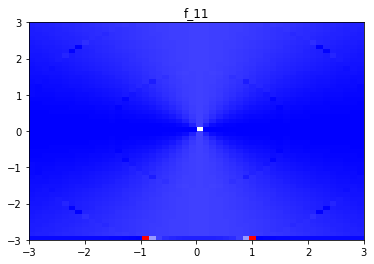

In [7]:
fig = plt.figure()
plt.pcolormesh(xvec, yvec, f_11, cmap='bwr')
plt.title('f_11')

# f_11[:, 25]
# fig = plt.figure()
# plt.plot(f_11[:, 101])
# plt.plot(f_11[:, 100])



<ipython-input-14-dfb1bf052417>:1: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xvec, yvec, f_12, cmap='bwr' )


Text(0.5, 1.0, 'f_12')

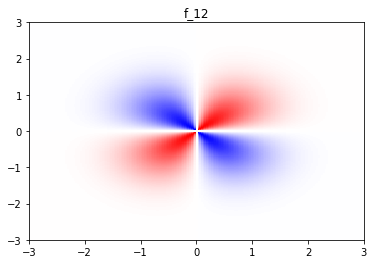

In [14]:
plt.pcolormesh(xvec, yvec, f_12, cmap='bwr' )
plt.title('f_12')

### Cat state

In [15]:
state_cat = tensor(fock(2, 0), (coherent(N, 2) + coherent(N, -2)).unit() )
p0 = np.zeros((len(xvec), len(yvec)))
p1 = np.zeros((len(xvec), len(yvec)))
for m, vx in enumerate(xvec):
    for n, vy in enumerate(yvec):
        state_d = D(vx + 1j*vy) * state_cat
        p0[m, n] = abs(state_d.overlap(state_cat))**2
        p1[m, n] = 1 - p0[m, n]

In [17]:
f_11 = (M_slope(p0, xvec, axis=0) * M_slope(p0, xvec, axis=0)) / p0 + (M_slope(p1, xvec, axis=0) * M_slope(p1, xvec, axis=0)) / p1
f_12 = (M_slope(p0, xvec, axis=0) * M_slope(p0, yvec, axis=1)) / p0 + (M_slope(p1, xvec, axis=0) * M_slope(p1, yvec, axis=1)) / p1
f_22 = (M_slope(p0, yvec, axis=1) * M_slope(p0, yvec, axis=1)) / p0 + (M_slope(p1, yvec, axis=1) * M_slope(p1, yvec, axis=1)) / p1


4.009262150825256

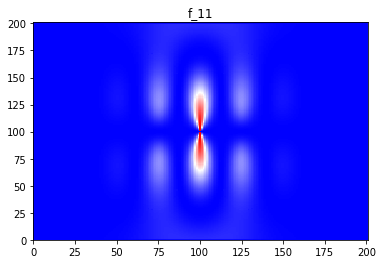

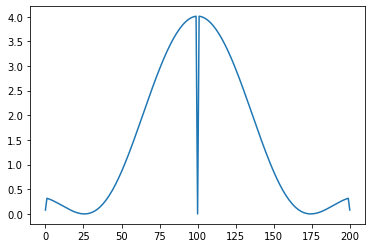

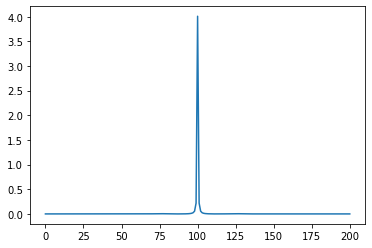

In [22]:
fig = plt.figure()
plt.pcolormesh(f_11, cmap='bwr')
plt.title('f_11')
f_11.shape
fig = plt.figure()
plt.plot(f_11[:, 100])
fig = plt.figure()
plt.plot(f_11[101, :])
f_11.max()


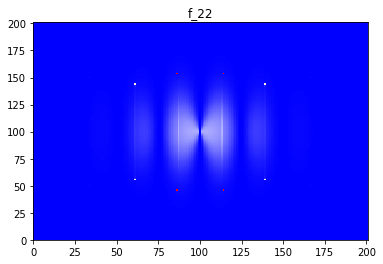

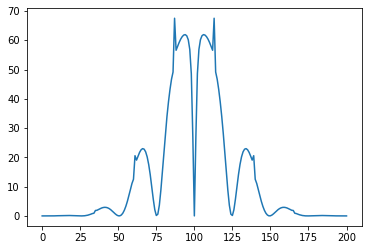

In [19]:
fig = plt.figure()
plt.pcolormesh(f_22, cmap='bwr')
plt.title('f_22')
f_11.shape

fig = plt.figure()
plt.plot(f_22[95,:])

### Four components Cat state

### Fork state